In [121]:
import torch
import torch.nn as nn
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

from tqdm import tqdm

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

In [122]:
dataset_train = FashionMNIST(root="../datasets", train=True, download=False, transform=ToTensor())
dataset_test = FashionMNIST(root="../datasets", train=False, download=False, transform=ToTensor())

In [123]:
BS = 32

train_dataloader = DataLoader(dataset_train, batch_size=BS, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=BS, shuffle=False)

In [192]:
# goal: 94% accuracy
class DaModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            
            nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1),#28x28
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2), # 14x14
            
            nn.Conv2d(in_channels=12, out_channels=6, kernel_size=3, stride=1, padding=0), # 12x12
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Flatten(),
            
            nn.Linear(in_features=6*6*6, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10),
            
            nn.LogSoftmax(dim=1)
            
        )
    def forward(self, x):
        return self.layer_stack(x)

In [212]:
device = torch.device("cuda")

In [213]:
model = DaModel()
model = model.to(device)

losses = []
accs = []

In [241]:
model.train()

N_DATA = 60_000

N_EPOCHS = 15

loss_fn = nn.NLLLoss()

def acc_fn(pred, target): return (pred.argmax(dim=1)==target).sum()

optim = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.1)

N_BATCHES = (N_DATA / BS)


for epoch in tqdm(range(N_EPOCHS)):
    for batch, (x, y) in enumerate(train_dataloader):
        optim.zero_grad()
        
        pred = model(x.type(torch.float).to(device))
        target = y.to(device)
        loss = loss_fn(pred, target)
        acc = acc_fn(pred, target)
        accs.append(acc.item()/BS)
        losses.append(loss.item()/BS)
        loss.backward()

        optim.step()
        if batch % 150 == 0: print(f"Epoch: {epoch}/{N_EPOCHS}, Batch: {batch}/{N_BATCHES}, Loss: {losses[len(losses)-1]}, Acc: {accs[len(accs)-1]}")

  0%|                                                                                                                            | 0/15 [00:00<?, ?it/s]

Epoch: 0/15, Batch: 0/1875.0, Loss: 0.0039142463356256485, Acc: 0.9375
Epoch: 0/15, Batch: 150/1875.0, Loss: 0.0011038491502404213, Acc: 1.0
Epoch: 0/15, Batch: 300/1875.0, Loss: 0.0019068714464083314, Acc: 0.96875
Epoch: 0/15, Batch: 450/1875.0, Loss: 0.003804465988650918, Acc: 0.9375
Epoch: 0/15, Batch: 600/1875.0, Loss: 0.0019747265614569187, Acc: 0.96875
Epoch: 0/15, Batch: 750/1875.0, Loss: 0.005960511974990368, Acc: 0.9375
Epoch: 0/15, Batch: 900/1875.0, Loss: 0.0031875078566372395, Acc: 0.9375
Epoch: 0/15, Batch: 1050/1875.0, Loss: 0.0018268685089424253, Acc: 1.0
Epoch: 0/15, Batch: 1200/1875.0, Loss: 0.005244090687483549, Acc: 0.90625
Epoch: 0/15, Batch: 1350/1875.0, Loss: 0.0015787146985530853, Acc: 0.96875
Epoch: 0/15, Batch: 1500/1875.0, Loss: 0.0038124695420265198, Acc: 0.9375
Epoch: 0/15, Batch: 1650/1875.0, Loss: 0.0006167262326925993, Acc: 1.0
Epoch: 0/15, Batch: 1800/1875.0, Loss: 0.004840316250920296, Acc: 0.90625


  7%|███████▋                                                                                                            | 1/15 [00:07<01:43,  7.36s/it]

Epoch: 1/15, Batch: 0/1875.0, Loss: 0.004309236072003841, Acc: 0.96875
Epoch: 1/15, Batch: 150/1875.0, Loss: 0.004624564200639725, Acc: 0.90625
Epoch: 1/15, Batch: 300/1875.0, Loss: 0.00294431927613914, Acc: 0.96875
Epoch: 1/15, Batch: 450/1875.0, Loss: 0.0014850628795102239, Acc: 1.0
Epoch: 1/15, Batch: 600/1875.0, Loss: 0.0008853236795403063, Acc: 1.0
Epoch: 1/15, Batch: 750/1875.0, Loss: 0.014412570744752884, Acc: 0.90625
Epoch: 1/15, Batch: 900/1875.0, Loss: 0.0025955415330827236, Acc: 0.96875
Epoch: 1/15, Batch: 1050/1875.0, Loss: 0.002363163512200117, Acc: 0.96875
Epoch: 1/15, Batch: 1200/1875.0, Loss: 0.0019114062888547778, Acc: 0.96875
Epoch: 1/15, Batch: 1350/1875.0, Loss: 0.0018705794354900718, Acc: 0.96875
Epoch: 1/15, Batch: 1500/1875.0, Loss: 0.0002991776564158499, Acc: 1.0
Epoch: 1/15, Batch: 1650/1875.0, Loss: 0.0023265157360583544, Acc: 0.96875
Epoch: 1/15, Batch: 1800/1875.0, Loss: 0.0012023544404655695, Acc: 1.0


 13%|███████████████▍                                                                                                    | 2/15 [00:14<01:35,  7.35s/it]

Epoch: 2/15, Batch: 0/1875.0, Loss: 0.000912176095880568, Acc: 1.0
Epoch: 2/15, Batch: 150/1875.0, Loss: 0.003002277109771967, Acc: 0.96875
Epoch: 2/15, Batch: 300/1875.0, Loss: 0.004379712510854006, Acc: 0.96875
Epoch: 2/15, Batch: 450/1875.0, Loss: 0.0025737155228853226, Acc: 0.96875
Epoch: 2/15, Batch: 600/1875.0, Loss: 0.0021755832713097334, Acc: 0.96875
Epoch: 2/15, Batch: 750/1875.0, Loss: 0.002172706415876746, Acc: 0.96875
Epoch: 2/15, Batch: 900/1875.0, Loss: 0.0052490257658064365, Acc: 0.9375
Epoch: 2/15, Batch: 1050/1875.0, Loss: 0.0041258204728364944, Acc: 0.96875
Epoch: 2/15, Batch: 1200/1875.0, Loss: 0.002394732553511858, Acc: 0.96875
Epoch: 2/15, Batch: 1350/1875.0, Loss: 0.009139543399214745, Acc: 0.96875
Epoch: 2/15, Batch: 1500/1875.0, Loss: 0.004318478982895613, Acc: 0.9375
Epoch: 2/15, Batch: 1650/1875.0, Loss: 0.0006063610780984163, Acc: 1.0
Epoch: 2/15, Batch: 1800/1875.0, Loss: 0.006399729289114475, Acc: 0.9375


 20%|███████████████████████▏                                                                                            | 3/15 [00:22<01:28,  7.35s/it]

Epoch: 3/15, Batch: 0/1875.0, Loss: 0.0051826052367687225, Acc: 0.90625
Epoch: 3/15, Batch: 150/1875.0, Loss: 0.0028168740682303905, Acc: 0.96875
Epoch: 3/15, Batch: 300/1875.0, Loss: 0.0016991416923701763, Acc: 1.0
Epoch: 3/15, Batch: 450/1875.0, Loss: 0.0008587496704421937, Acc: 1.0
Epoch: 3/15, Batch: 600/1875.0, Loss: 0.000999498413875699, Acc: 1.0
Epoch: 3/15, Batch: 750/1875.0, Loss: 0.0030621858313679695, Acc: 0.9375
Epoch: 3/15, Batch: 900/1875.0, Loss: 0.0009584624785929918, Acc: 1.0
Epoch: 3/15, Batch: 1050/1875.0, Loss: 0.0008374151075258851, Acc: 1.0
Epoch: 3/15, Batch: 1200/1875.0, Loss: 0.00037650211015716195, Acc: 1.0
Epoch: 3/15, Batch: 1350/1875.0, Loss: 0.0011253230040892959, Acc: 1.0
Epoch: 3/15, Batch: 1500/1875.0, Loss: 0.0009514493867754936, Acc: 1.0
Epoch: 3/15, Batch: 1650/1875.0, Loss: 0.003583192825317383, Acc: 0.9375
Epoch: 3/15, Batch: 1800/1875.0, Loss: 0.004036321304738522, Acc: 0.96875


 27%|██████████████████████████████▉                                                                                     | 4/15 [00:29<01:20,  7.34s/it]

Epoch: 4/15, Batch: 0/1875.0, Loss: 0.004328256472945213, Acc: 0.9375
Epoch: 4/15, Batch: 150/1875.0, Loss: 0.0016342055751010776, Acc: 0.96875
Epoch: 4/15, Batch: 300/1875.0, Loss: 0.0042043873108923435, Acc: 0.9375
Epoch: 4/15, Batch: 450/1875.0, Loss: 0.003351053223013878, Acc: 0.9375
Epoch: 4/15, Batch: 600/1875.0, Loss: 0.004936125595122576, Acc: 0.90625
Epoch: 4/15, Batch: 750/1875.0, Loss: 0.001234821043908596, Acc: 1.0
Epoch: 4/15, Batch: 900/1875.0, Loss: 0.0016967759002000093, Acc: 1.0
Epoch: 4/15, Batch: 1050/1875.0, Loss: 0.0038345230277627707, Acc: 0.9375
Epoch: 4/15, Batch: 1200/1875.0, Loss: 0.004294415470212698, Acc: 0.90625
Epoch: 4/15, Batch: 1350/1875.0, Loss: 0.002786168595775962, Acc: 0.96875
Epoch: 4/15, Batch: 1500/1875.0, Loss: 0.0024663389194756746, Acc: 0.96875
Epoch: 4/15, Batch: 1650/1875.0, Loss: 0.003133409656584263, Acc: 0.96875
Epoch: 4/15, Batch: 1800/1875.0, Loss: 0.0047792126424610615, Acc: 0.90625


 33%|██████████████████████████████████████▋                                                                             | 5/15 [00:36<01:13,  7.34s/it]

Epoch: 5/15, Batch: 0/1875.0, Loss: 0.002223898656666279, Acc: 0.9375
Epoch: 5/15, Batch: 150/1875.0, Loss: 0.0026621634606271982, Acc: 0.9375
Epoch: 5/15, Batch: 300/1875.0, Loss: 0.011047746054828167, Acc: 0.84375
Epoch: 5/15, Batch: 450/1875.0, Loss: 0.0014440682716667652, Acc: 1.0
Epoch: 5/15, Batch: 600/1875.0, Loss: 0.0004922655061818659, Acc: 1.0
Epoch: 5/15, Batch: 750/1875.0, Loss: 0.0034506034571677446, Acc: 0.96875
Epoch: 5/15, Batch: 900/1875.0, Loss: 0.0021526054479181767, Acc: 1.0
Epoch: 5/15, Batch: 1050/1875.0, Loss: 0.00393756665289402, Acc: 0.9375
Epoch: 5/15, Batch: 1200/1875.0, Loss: 0.005349878221750259, Acc: 0.9375
Epoch: 5/15, Batch: 1350/1875.0, Loss: 0.005375642795115709, Acc: 0.90625
Epoch: 5/15, Batch: 1500/1875.0, Loss: 0.006869223900139332, Acc: 0.96875
Epoch: 5/15, Batch: 1650/1875.0, Loss: 0.0039241742342710495, Acc: 0.96875
Epoch: 5/15, Batch: 1800/1875.0, Loss: 0.0015592157142236829, Acc: 1.0


 40%|██████████████████████████████████████████████▍                                                                     | 6/15 [00:44<01:05,  7.33s/it]

Epoch: 6/15, Batch: 0/1875.0, Loss: 0.001513168914243579, Acc: 1.0
Epoch: 6/15, Batch: 150/1875.0, Loss: 0.0007474678568542004, Acc: 1.0
Epoch: 6/15, Batch: 300/1875.0, Loss: 0.006889846175909042, Acc: 0.90625
Epoch: 6/15, Batch: 450/1875.0, Loss: 0.002184963785111904, Acc: 0.96875
Epoch: 6/15, Batch: 600/1875.0, Loss: 0.005519012920558453, Acc: 0.9375
Epoch: 6/15, Batch: 750/1875.0, Loss: 0.002054160460829735, Acc: 1.0
Epoch: 6/15, Batch: 900/1875.0, Loss: 0.0006560759502463043, Acc: 1.0
Epoch: 6/15, Batch: 1050/1875.0, Loss: 0.002290034666657448, Acc: 0.96875
Epoch: 6/15, Batch: 1200/1875.0, Loss: 0.004047363996505737, Acc: 0.90625
Epoch: 6/15, Batch: 1350/1875.0, Loss: 0.0010793490801006556, Acc: 1.0
Epoch: 6/15, Batch: 1500/1875.0, Loss: 0.0005747163668274879, Acc: 1.0
Epoch: 6/15, Batch: 1650/1875.0, Loss: 0.007001425605267286, Acc: 0.9375
Epoch: 6/15, Batch: 1800/1875.0, Loss: 0.0018746335990726948, Acc: 0.96875


 47%|██████████████████████████████████████████████████████▏                                                             | 7/15 [00:51<00:58,  7.33s/it]

Epoch: 7/15, Batch: 0/1875.0, Loss: 0.007889282889664173, Acc: 0.90625
Epoch: 7/15, Batch: 150/1875.0, Loss: 0.0007554612820968032, Acc: 1.0
Epoch: 7/15, Batch: 300/1875.0, Loss: 0.001877119648270309, Acc: 0.96875
Epoch: 7/15, Batch: 450/1875.0, Loss: 0.002038986189290881, Acc: 0.96875
Epoch: 7/15, Batch: 600/1875.0, Loss: 0.000732303480617702, Acc: 1.0
Epoch: 7/15, Batch: 750/1875.0, Loss: 0.0015990014653652906, Acc: 0.96875
Epoch: 7/15, Batch: 900/1875.0, Loss: 0.0024859600234776735, Acc: 0.96875
Epoch: 7/15, Batch: 1050/1875.0, Loss: 0.0038122208788990974, Acc: 0.9375
Epoch: 7/15, Batch: 1200/1875.0, Loss: 0.0024140875320881605, Acc: 0.96875
Epoch: 7/15, Batch: 1350/1875.0, Loss: 0.004443122074007988, Acc: 0.9375
Epoch: 7/15, Batch: 1500/1875.0, Loss: 0.0018414484802633524, Acc: 0.96875
Epoch: 7/15, Batch: 1650/1875.0, Loss: 0.0035728944931179285, Acc: 0.96875
Epoch: 7/15, Batch: 1800/1875.0, Loss: 0.003780619939789176, Acc: 0.96875


 53%|█████████████████████████████████████████████████████████████▊                                                      | 8/15 [00:58<00:51,  7.37s/it]

Epoch: 8/15, Batch: 0/1875.0, Loss: 0.0016742866719141603, Acc: 0.96875
Epoch: 8/15, Batch: 150/1875.0, Loss: 0.0027414995711296797, Acc: 0.96875
Epoch: 8/15, Batch: 300/1875.0, Loss: 0.0014072554185986519, Acc: 1.0
Epoch: 8/15, Batch: 450/1875.0, Loss: 0.001915300847031176, Acc: 1.0
Epoch: 8/15, Batch: 600/1875.0, Loss: 0.003529610810801387, Acc: 0.96875
Epoch: 8/15, Batch: 750/1875.0, Loss: 0.0027118786238133907, Acc: 0.9375
Epoch: 8/15, Batch: 900/1875.0, Loss: 0.0010423088679090142, Acc: 1.0
Epoch: 8/15, Batch: 1050/1875.0, Loss: 0.00436409143730998, Acc: 0.9375
Epoch: 8/15, Batch: 1200/1875.0, Loss: 0.0038083887193351984, Acc: 0.96875
Epoch: 8/15, Batch: 1350/1875.0, Loss: 0.004656019154936075, Acc: 0.9375
Epoch: 8/15, Batch: 1500/1875.0, Loss: 0.004373752977699041, Acc: 0.96875
Epoch: 8/15, Batch: 1650/1875.0, Loss: 0.0013134272303432226, Acc: 1.0
Epoch: 8/15, Batch: 1800/1875.0, Loss: 0.007774589117616415, Acc: 0.84375


 60%|█████████████████████████████████████████████████████████████████████▌                                              | 9/15 [01:06<00:44,  7.41s/it]

Epoch: 9/15, Batch: 0/1875.0, Loss: 0.0017758490284904838, Acc: 0.96875
Epoch: 9/15, Batch: 150/1875.0, Loss: 0.0019122132798656821, Acc: 0.96875
Epoch: 9/15, Batch: 300/1875.0, Loss: 0.004692771937698126, Acc: 0.90625
Epoch: 9/15, Batch: 450/1875.0, Loss: 0.0030368580482900143, Acc: 0.9375
Epoch: 9/15, Batch: 600/1875.0, Loss: 0.0018702896777540445, Acc: 0.96875
Epoch: 9/15, Batch: 750/1875.0, Loss: 0.007905243895947933, Acc: 0.90625
Epoch: 9/15, Batch: 900/1875.0, Loss: 0.001664177281782031, Acc: 1.0
Epoch: 9/15, Batch: 1050/1875.0, Loss: 0.0009580343030393124, Acc: 1.0
Epoch: 9/15, Batch: 1200/1875.0, Loss: 0.003040740732103586, Acc: 0.9375
Epoch: 9/15, Batch: 1350/1875.0, Loss: 0.0011865368578583002, Acc: 1.0
Epoch: 9/15, Batch: 1500/1875.0, Loss: 0.0009706807904876769, Acc: 1.0
Epoch: 9/15, Batch: 1650/1875.0, Loss: 0.0036084626335650682, Acc: 0.96875
Epoch: 9/15, Batch: 1800/1875.0, Loss: 0.00582911679521203, Acc: 0.90625


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 10/15 [01:13<00:37,  7.44s/it]

Epoch: 10/15, Batch: 0/1875.0, Loss: 0.0026805452071130276, Acc: 0.9375
Epoch: 10/15, Batch: 150/1875.0, Loss: 0.0035802607890218496, Acc: 0.96875
Epoch: 10/15, Batch: 300/1875.0, Loss: 0.000337735575158149, Acc: 1.0
Epoch: 10/15, Batch: 450/1875.0, Loss: 0.0017858737846836448, Acc: 0.96875
Epoch: 10/15, Batch: 600/1875.0, Loss: 0.0031588301062583923, Acc: 0.96875
Epoch: 10/15, Batch: 750/1875.0, Loss: 0.004415629897266626, Acc: 0.9375
Epoch: 10/15, Batch: 900/1875.0, Loss: 0.010233782231807709, Acc: 0.875
Epoch: 10/15, Batch: 1050/1875.0, Loss: 0.0016834288835525513, Acc: 1.0
Epoch: 10/15, Batch: 1200/1875.0, Loss: 0.0010005878284573555, Acc: 1.0
Epoch: 10/15, Batch: 1350/1875.0, Loss: 0.006934992037713528, Acc: 0.9375
Epoch: 10/15, Batch: 1500/1875.0, Loss: 0.004596345126628876, Acc: 0.9375
Epoch: 10/15, Batch: 1650/1875.0, Loss: 0.0008671837276779115, Acc: 1.0
Epoch: 10/15, Batch: 1800/1875.0, Loss: 0.0013192279729992151, Acc: 1.0


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 11/15 [01:21<00:29,  7.48s/it]

Epoch: 11/15, Batch: 0/1875.0, Loss: 0.002182027790695429, Acc: 1.0
Epoch: 11/15, Batch: 150/1875.0, Loss: 0.0034960084594786167, Acc: 0.96875
Epoch: 11/15, Batch: 300/1875.0, Loss: 0.002442823024466634, Acc: 0.96875
Epoch: 11/15, Batch: 450/1875.0, Loss: 0.0019522964721545577, Acc: 0.96875
Epoch: 11/15, Batch: 600/1875.0, Loss: 0.004855736158788204, Acc: 0.9375
Epoch: 11/15, Batch: 750/1875.0, Loss: 0.003022058866918087, Acc: 0.9375
Epoch: 11/15, Batch: 900/1875.0, Loss: 0.0007921098731458187, Acc: 1.0
Epoch: 11/15, Batch: 1050/1875.0, Loss: 0.002665872685611248, Acc: 0.96875
Epoch: 11/15, Batch: 1200/1875.0, Loss: 0.00048399996012449265, Acc: 1.0
Epoch: 11/15, Batch: 1350/1875.0, Loss: 0.0033603478223085403, Acc: 0.96875
Epoch: 11/15, Batch: 1500/1875.0, Loss: 0.007566340267658234, Acc: 0.90625
Epoch: 11/15, Batch: 1650/1875.0, Loss: 0.005905951373279095, Acc: 0.9375
Epoch: 11/15, Batch: 1800/1875.0, Loss: 0.0022002370096743107, Acc: 0.96875


 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 12/15 [01:28<00:22,  7.46s/it]

Epoch: 12/15, Batch: 0/1875.0, Loss: 0.0016228329623118043, Acc: 0.96875
Epoch: 12/15, Batch: 150/1875.0, Loss: 0.0006179346819408238, Acc: 1.0
Epoch: 12/15, Batch: 300/1875.0, Loss: 0.004785622004419565, Acc: 0.90625
Epoch: 12/15, Batch: 450/1875.0, Loss: 0.0008661075262352824, Acc: 1.0
Epoch: 12/15, Batch: 600/1875.0, Loss: 0.001842000288888812, Acc: 0.96875
Epoch: 12/15, Batch: 750/1875.0, Loss: 0.0007566075655631721, Acc: 1.0
Epoch: 12/15, Batch: 900/1875.0, Loss: 0.00025723836733959615, Acc: 1.0
Epoch: 12/15, Batch: 1050/1875.0, Loss: 0.0020783778745681047, Acc: 0.96875
Epoch: 12/15, Batch: 1200/1875.0, Loss: 0.002056090161204338, Acc: 0.96875
Epoch: 12/15, Batch: 1350/1875.0, Loss: 0.005459180101752281, Acc: 0.9375
Epoch: 12/15, Batch: 1500/1875.0, Loss: 0.0026732541155070066, Acc: 0.96875
Epoch: 12/15, Batch: 1650/1875.0, Loss: 0.0007106545963324606, Acc: 1.0
Epoch: 12/15, Batch: 1800/1875.0, Loss: 0.00039616055437363684, Acc: 1.0


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▋               | 13/15 [01:36<00:14,  7.44s/it]

Epoch: 13/15, Batch: 0/1875.0, Loss: 0.000987524981610477, Acc: 1.0
Epoch: 13/15, Batch: 150/1875.0, Loss: 0.001109129167161882, Acc: 0.96875
Epoch: 13/15, Batch: 300/1875.0, Loss: 0.001633394742384553, Acc: 1.0
Epoch: 13/15, Batch: 450/1875.0, Loss: 0.00038755033165216446, Acc: 1.0
Epoch: 13/15, Batch: 600/1875.0, Loss: 0.0019128138665109873, Acc: 0.96875
Epoch: 13/15, Batch: 750/1875.0, Loss: 0.005073465406894684, Acc: 0.875
Epoch: 13/15, Batch: 900/1875.0, Loss: 0.0032493851613253355, Acc: 0.96875
Epoch: 13/15, Batch: 1050/1875.0, Loss: 0.0013073746813461185, Acc: 1.0
Epoch: 13/15, Batch: 1200/1875.0, Loss: 0.009460382163524628, Acc: 0.9375
Epoch: 13/15, Batch: 1350/1875.0, Loss: 0.004656630102545023, Acc: 0.96875
Epoch: 13/15, Batch: 1500/1875.0, Loss: 0.004888793919235468, Acc: 0.96875
Epoch: 13/15, Batch: 1650/1875.0, Loss: 0.0019993335008621216, Acc: 1.0
Epoch: 13/15, Batch: 1800/1875.0, Loss: 0.00035616994136944413, Acc: 1.0


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 14/15 [01:43<00:07,  7.43s/it]

Epoch: 14/15, Batch: 0/1875.0, Loss: 0.0014058237429708242, Acc: 1.0
Epoch: 14/15, Batch: 150/1875.0, Loss: 0.002566376468166709, Acc: 0.96875
Epoch: 14/15, Batch: 300/1875.0, Loss: 0.0025544092059135437, Acc: 0.9375
Epoch: 14/15, Batch: 450/1875.0, Loss: 0.0017614467069506645, Acc: 0.96875
Epoch: 14/15, Batch: 600/1875.0, Loss: 0.007585706189274788, Acc: 0.90625
Epoch: 14/15, Batch: 750/1875.0, Loss: 0.0005949291517026722, Acc: 1.0
Epoch: 14/15, Batch: 900/1875.0, Loss: 0.0015268189599737525, Acc: 1.0
Epoch: 14/15, Batch: 1050/1875.0, Loss: 0.0017700953176245093, Acc: 0.96875
Epoch: 14/15, Batch: 1200/1875.0, Loss: 0.004439151845872402, Acc: 0.9375
Epoch: 14/15, Batch: 1350/1875.0, Loss: 0.0006621874053962529, Acc: 1.0
Epoch: 14/15, Batch: 1500/1875.0, Loss: 0.0017601284198462963, Acc: 1.0
Epoch: 14/15, Batch: 1650/1875.0, Loss: 0.007914617657661438, Acc: 0.90625
Epoch: 14/15, Batch: 1800/1875.0, Loss: 0.0009879523422569036, Acc: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:51<00:00,  7.40s/it]


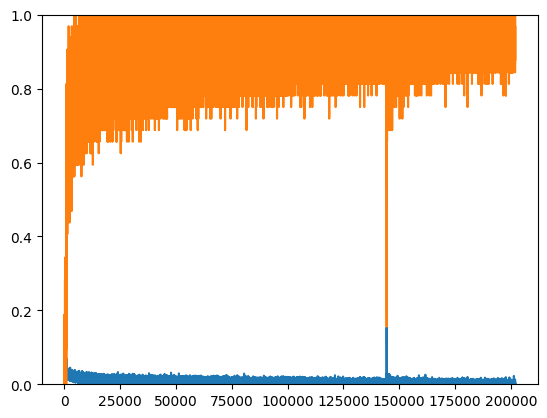

In [245]:
plt.ylim(0.0, 1.0)
plt.plot(losses)
plt.plot(accs)

In [246]:
model.eval()

score = 0

for x, y in test_dataloader:
    score += (acc_fn(model(x.to(device)), y.to(device))).item()

print(score)

9051
